mean = -1.0286291926748328
mean = -0.5074721014446656
mean = -1.5507818273491125e-07
mean = 0.49209010752997917
mean = 0.9677022757823258


<ipython-input-45-f3a6863b0bdb>:24: UserWarning: Attempting to set identical bottom == top == 0.49209010752997917 results in singular transformations; automatically expanding.
  ax2.set_ylim((np.min(energy2), np.max(energy2)))


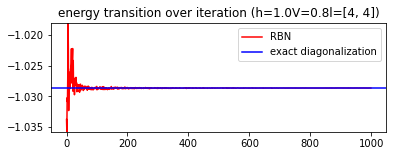

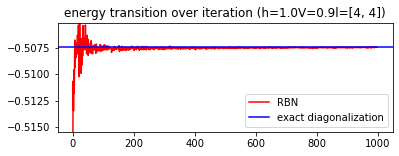

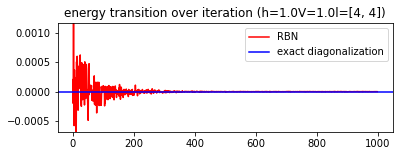

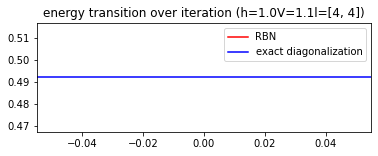

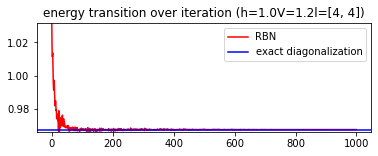

In [45]:
# Load the data from the .log file

import numpy as np
import json

# filename1 = 'h=1.0V=1.0l=[4, 4].log'

exact_energy = [-1.028629, -0.507427, 0, 0.492100, 0.967703]
vs = [0.8, 0.9, 1.0, 1.1, 1.2]
for v, e in zip(vs, exact_energy):
    filename2 = f'h=1.0V={v}l=[4, 4].log'
    data2=json.load(open("../log/"+filename2))["Output"]
    
    energy2 = []
    for i, d_ in enumerate(data2):
        energy2.append(d_['Energy']["Mean"])

    iters = np.arange(0, len(energy2))
    
    fig, ax2 = plt.subplots(1,figsize=(6, 2))
    ax2.set_title(f"energy transition over iteration (h=1.0V={v}l=[4, 4])")
    ax2.plot(iters, energy2, color='red', label='RBN')
    ax2.axhline(y=e, color='b',label="exact diagonalization")
    ax2.set_ylim((np.min(energy2), np.max(energy2)))
    ax2.legend()
    plt.savefig(f"image_V={v}.png")
    
    print(f'mean = {np.mean(energy2[-200:])}')


In [1]:
import sys
import importlib
importlib.reload(sys)
sys.path.insert(0,'../')
import numpy as np
import netket as nk
from scripts import functions as f
from scripts import new_dynamics, new_dynamics2
import os
currentpath = os.getcwd()
parentdir = os.path.dirname(currentpath)
from conf import *

length = [4,4]
hex_ = nk.machine.new_hex(np.array(length))
t_list = np.arange(0,20,0.1)


In [2]:
dimer = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_real_mean_5.0e+05.npy")
dimer_momentum = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_momentum_mean_5.0e+05.npy")

In [25]:
dimer_momentum

NameError: name 'dimer_momentum' is not defined

In [3]:
dimer_momentum_ = np.zeros((3,3,2 * length[0], 2*length[1],len(t_list)),dtype=np.complex128)
for a in range(3):
    for b in range(3):
        dimer_momentum_[a,b] = f.dimer_fourier2D(dimer[a,b])

In [4]:
A = np.array([
hex_.a1,
hex_.a2
])
[b1, b2] = np.linalg.inv(A.T)

In [5]:
x = np.arange(length[0])
y = np.arange(length[1])

xx, yy = np.meshgrid(x,y)
xx = xx.reshape(-1)
yy = yy.reshape(-1)

np.coordinates = np.zeros((8, 8, 2))

for i in range(8):
    for j in range(8):
        np.coordinates[i,j] = b1 * i + b2 * j 

In [27]:
from matplotlib import pyplot as plt

from scipy.stats import linregress
def fit(x, y, w):
    
    L = x.shape[0]
    
    slope, intercept, r, p, se = linregress(x, y)
    
    return slope, intercept, r

In [29]:
import scipy
# params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list,  np.abs(dimer_momentum[index].real))

In [31]:
t_list.shape

(30,)

<ipython-input-34-8aac00316901>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,figsize=(6, 3))


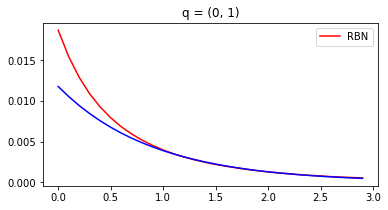

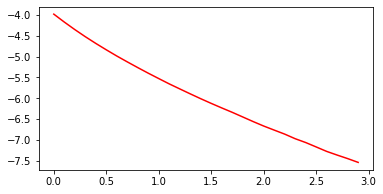

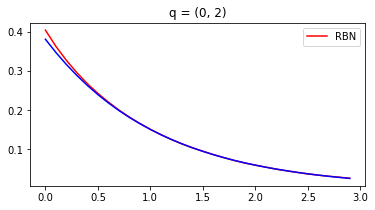

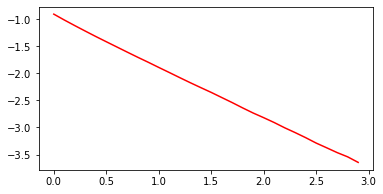

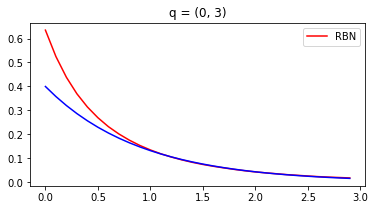

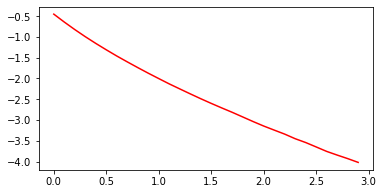

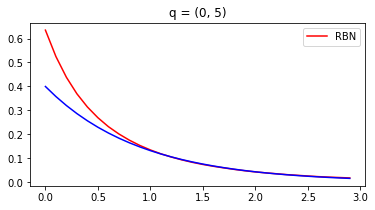

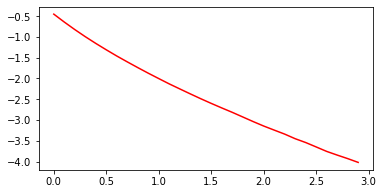

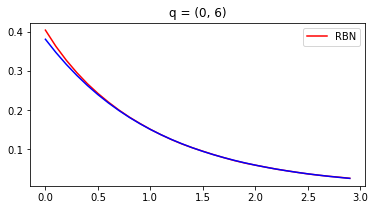

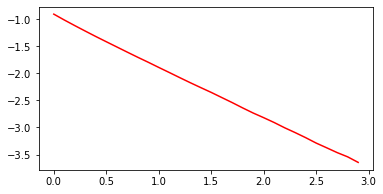

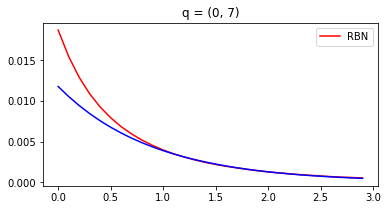

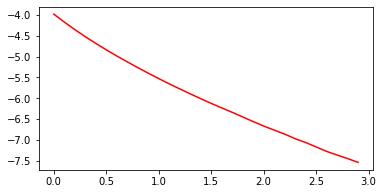

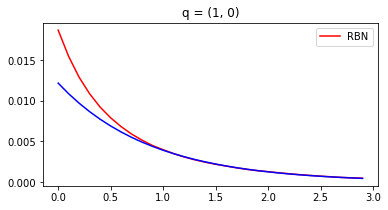

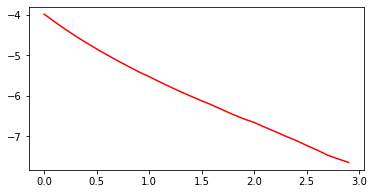

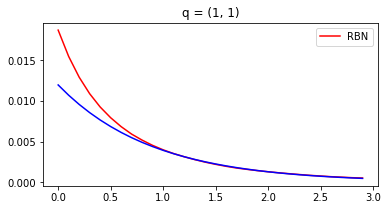

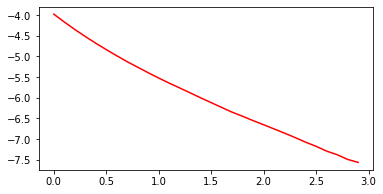

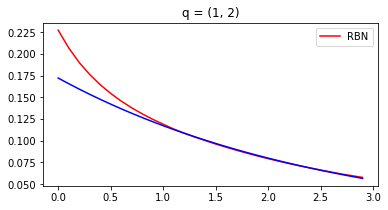

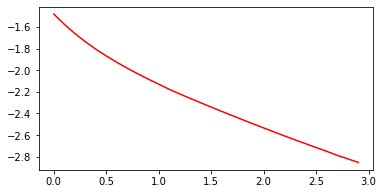

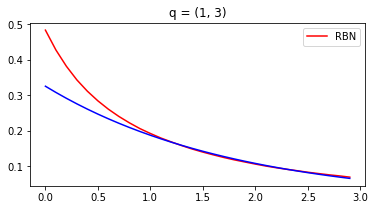

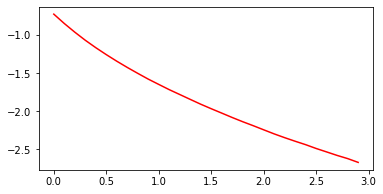

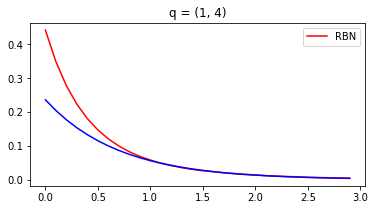

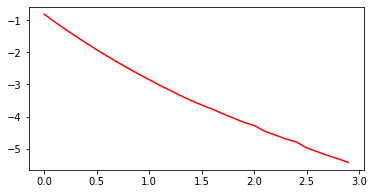

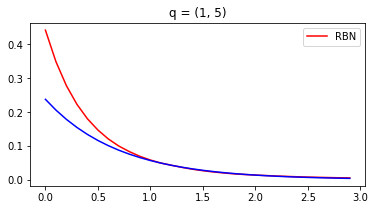

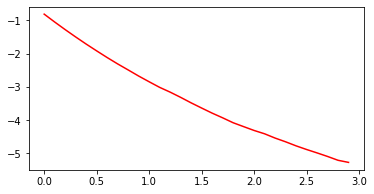

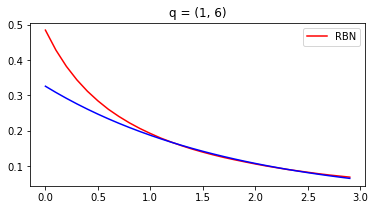

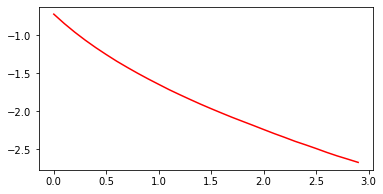

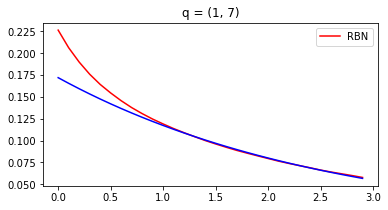

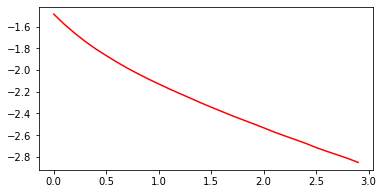

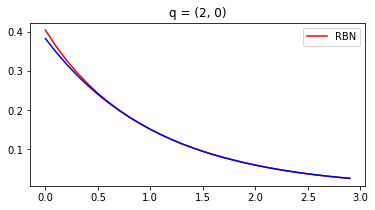

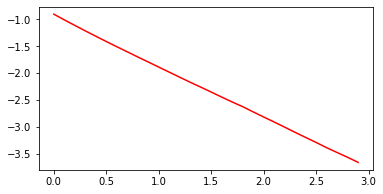

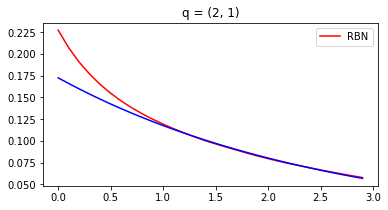

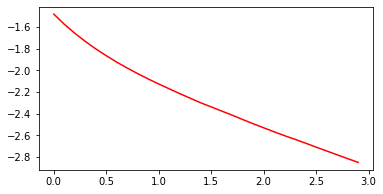

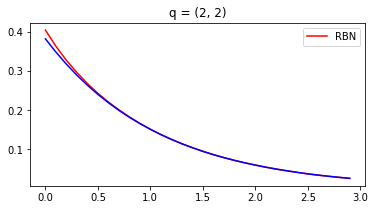

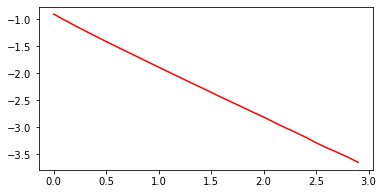

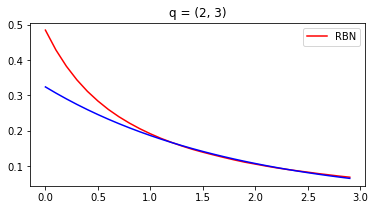

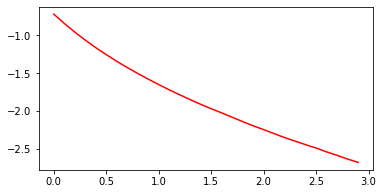

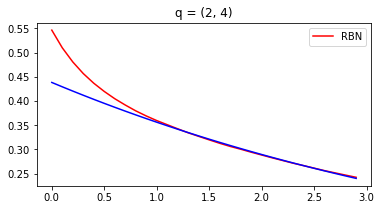

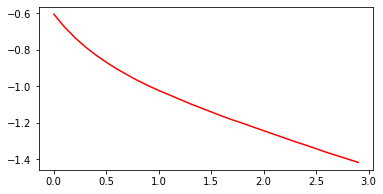

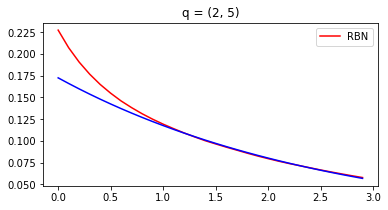

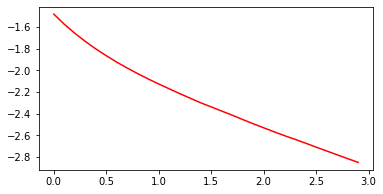

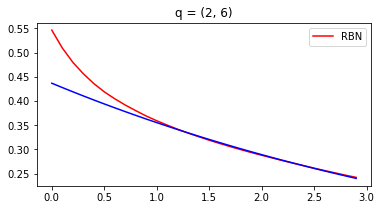

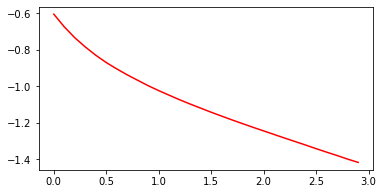

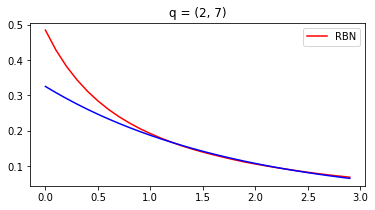

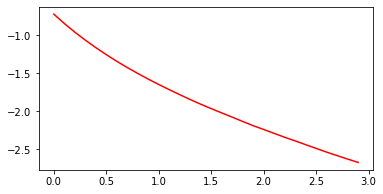

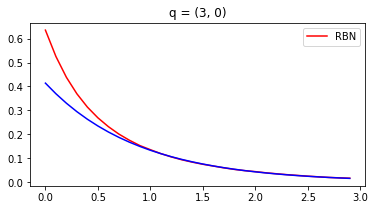

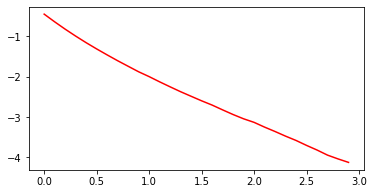

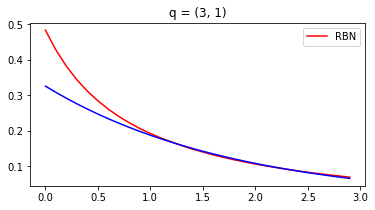

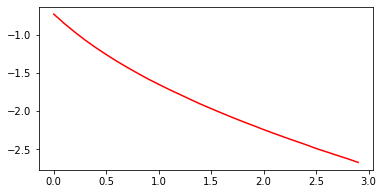

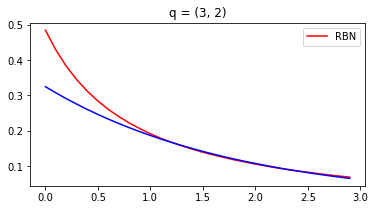

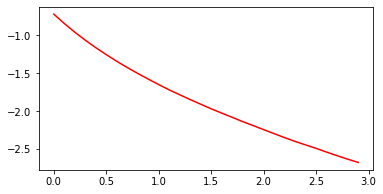

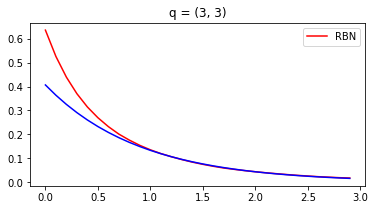

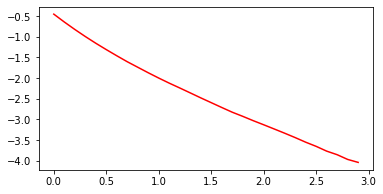

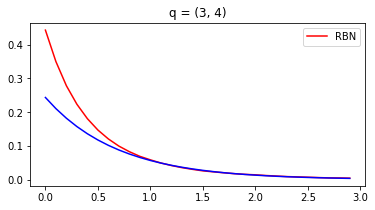

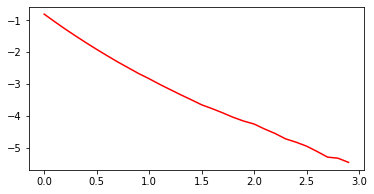

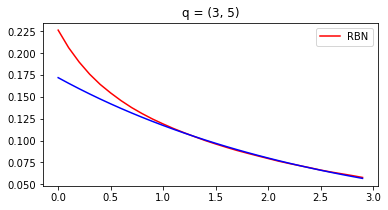

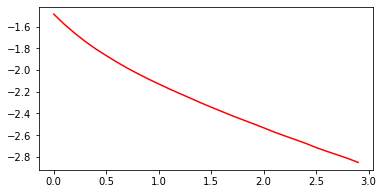

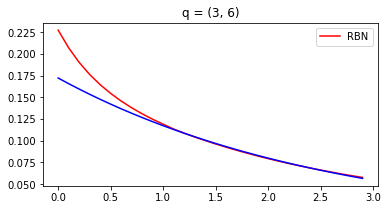

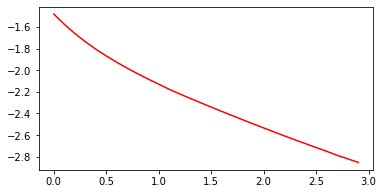

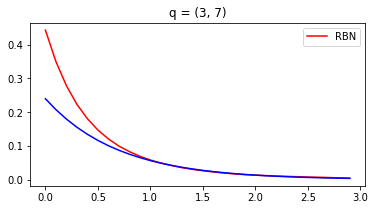

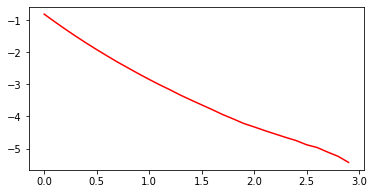

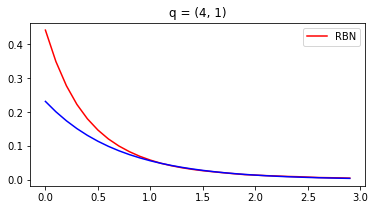

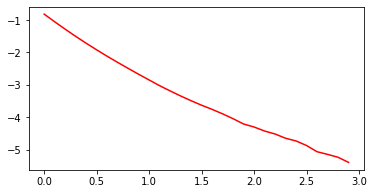

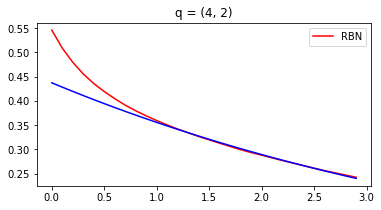

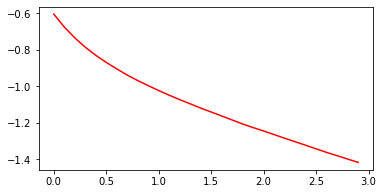

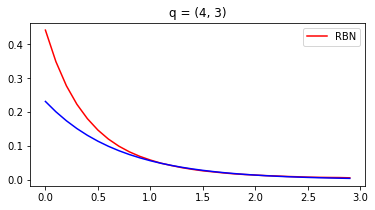

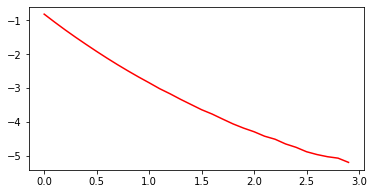

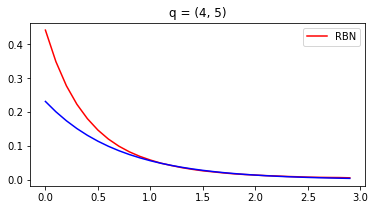

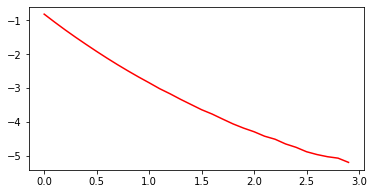

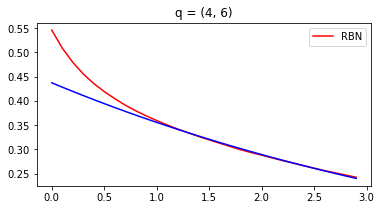

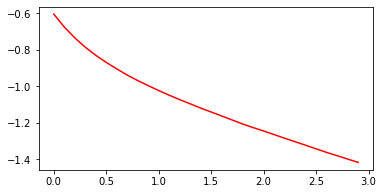

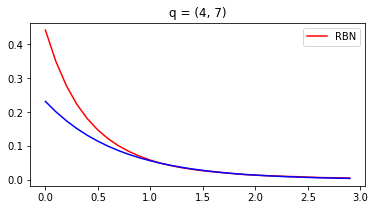

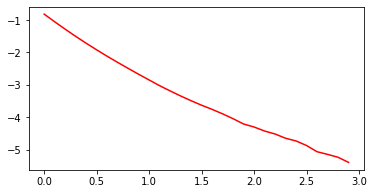

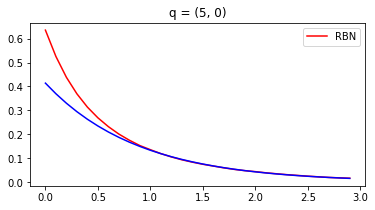

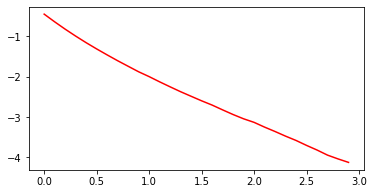

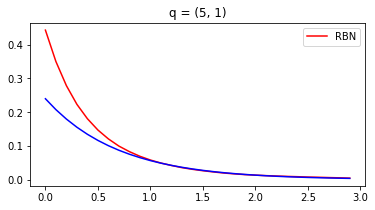

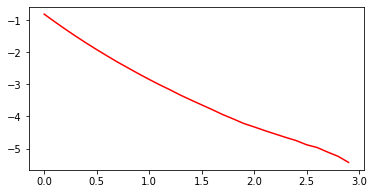

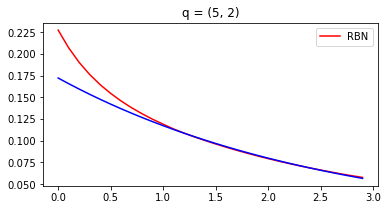

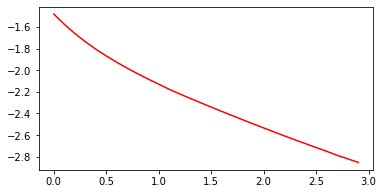

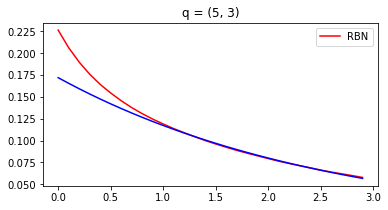

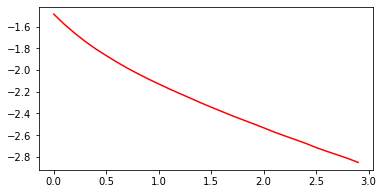

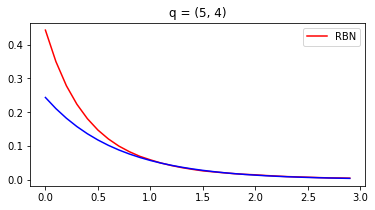

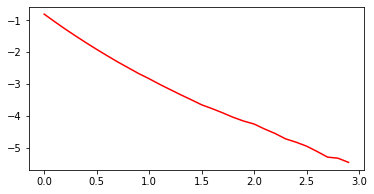

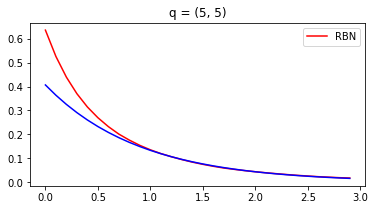

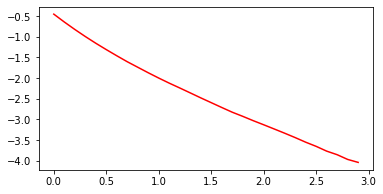

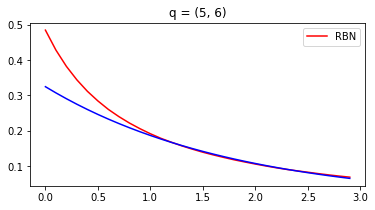

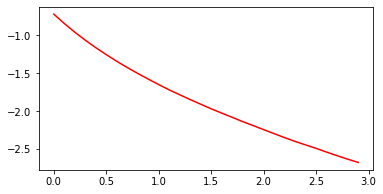

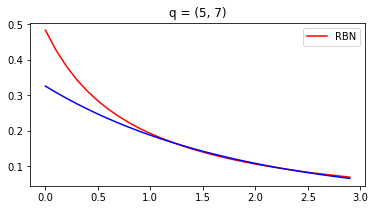

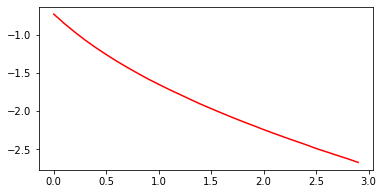

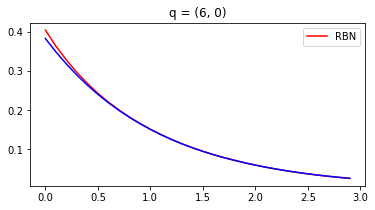

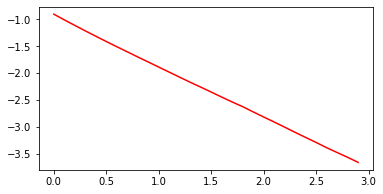

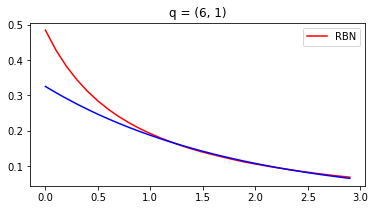

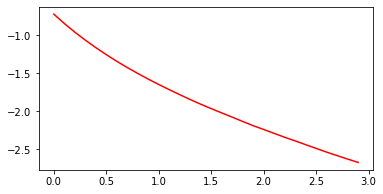

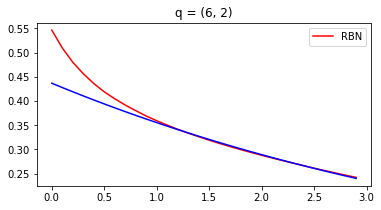

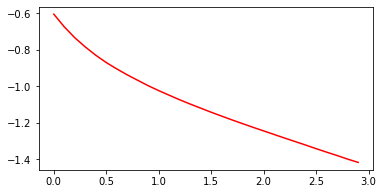

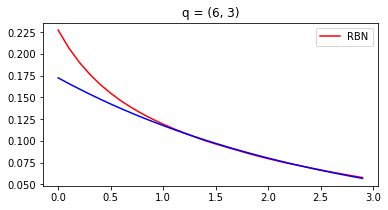

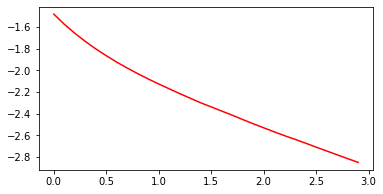

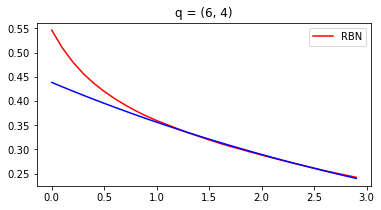

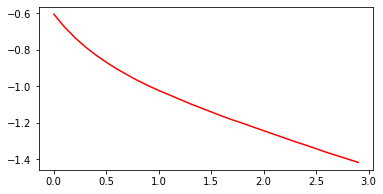

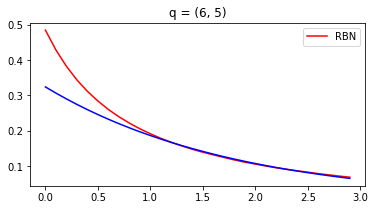

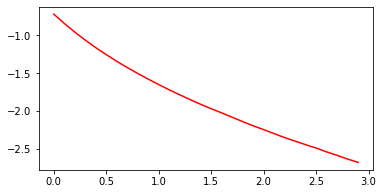

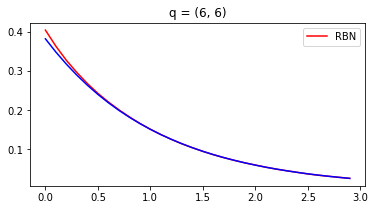

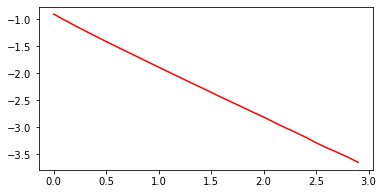

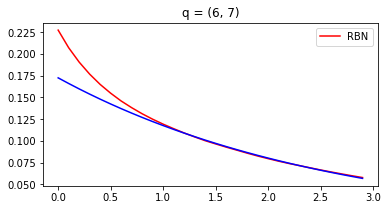

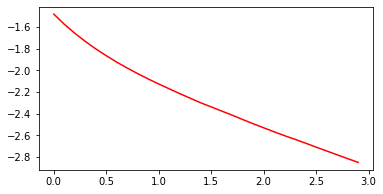

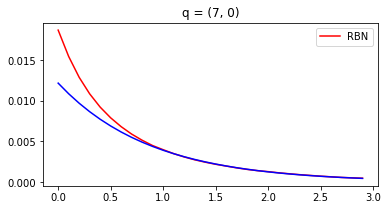

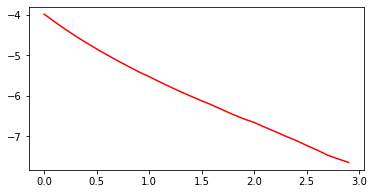

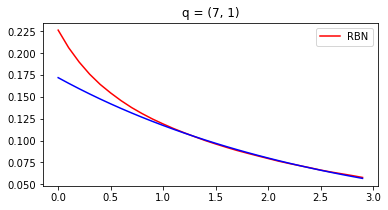

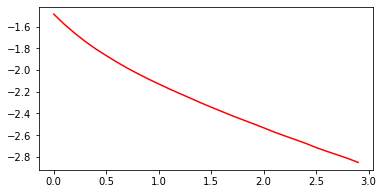

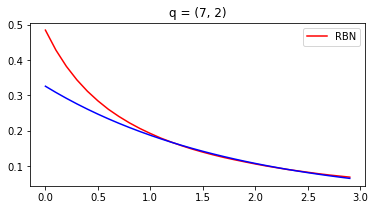

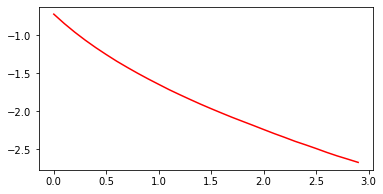

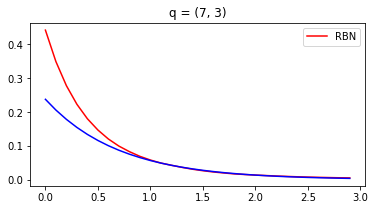

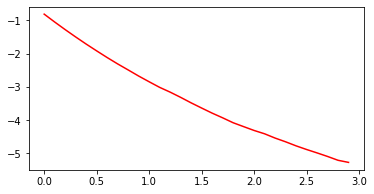

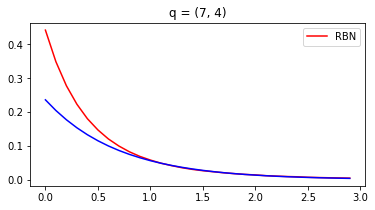

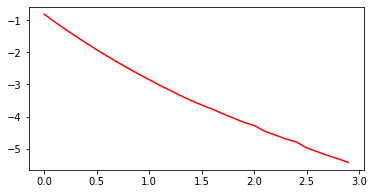

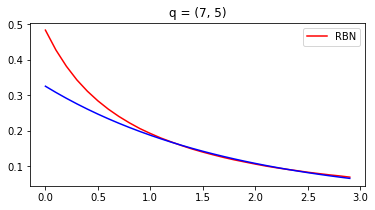

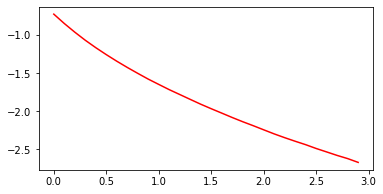

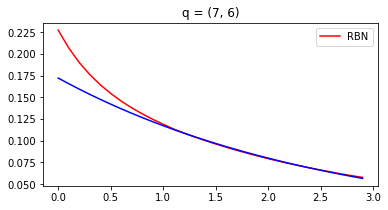

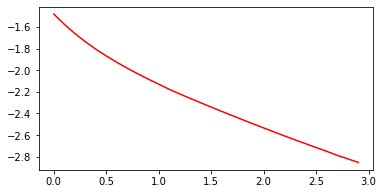

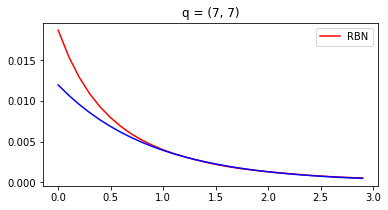

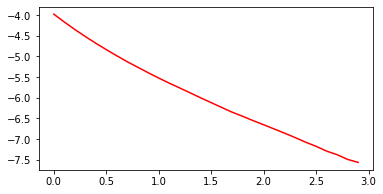

In [34]:
import scipy
fitting_energy = []
index_list =[]
for i in range(8):
    for j in range(8):
        index = (i, j)
        if (i in [0,4]) and (j in [0,4]):
            continue
        index_list.append(index)
        fig, ax = plt.subplots(1,figsize=(6, 3))
        
        ax.plot(t_list, np.abs(dimer_momentum2[index].real), color='red', label='RBN')
        ax.set_title(f"q = {index}")
        ax.legend()
        params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list[10:],  np.abs(dimer_momentum2[index].real[10:]))
        ax.plot(t_list, params[0] * np.exp(-params[1]*t_list), color='blue', label='fitted')

        fig2, ax2 = plt.subplots(1,figsize=(6, 3))

        ax2.plot(t_list, np.log(np.abs(dimer_momentum2[index].real)), color='red', label='RBN')
        
        fitting_energy.append(params[1])
        


In [35]:

A = np.array([
hex_.a1,
hex_.a2
])

[b1, b2] = np.linalg.inv(A.T)

n = len(index_list)
corr = np.zeros((n,2))

s = 0
for (i,j) in index_list:
    corr[s] = b1 * i + b2 * j
    s+=1


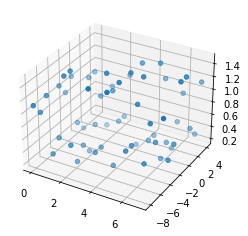

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=corr[:,0], ys=corr[:,1], zs=np.array(fitting_energy))

In [37]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 10, 50)
x, y, z = corr[:,0], corr[:,1], np.array(fitting_energy)

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])
fig.show()

In [2]:
length = [4, 4]
hex_ = nk.machine.new_hex(np.array(length))

kernel = 1
# sweep_size = 200
decay_factor = 1  # or 'sigmoid decay'



g = nk.graph.Graph(nodes = [i for i in range(length[0] * length[1] * 2)])
hi = nk.hilbert.Spin(s=0.5, graph=g)



op, ad2o_o, op_num, label_num  = f.dimer_flip1(length = np.array(length), return_info = True)
op2= f.dimer_flip_old(length = np.array(length))

ad2_bool = np.zeros([ad2o_o.shape[0], ad2o_o.shape[0]], dtype = np.bool)
for l in range(ad2o_o.shape[0]):
    label = ad2o_o[l]
    for op_ in label:
        ad2_bool[l,op_] = True
        
ma = nk.machine.RbmDimer(hi, hex_, alpha = 2, symmetry = True
                    ,use_hidden_bias = False, use_visible_bias = False, dtype=float, reverse=True, half=True)
ma.init_random_parameters(seed=1234)

ma.hex.ad2o_o = ad2o_o.astype(np.int64)
ma.hex.ad2_bool = ad2_bool

ma._ws[:] = np.random.normal(0, 1e-3)
ma._set_bare_parameters(
    ma._a, ma._b, ma._w, ma._as, ma._bs, ma._ws, ma._autom, ma._z2
)

V = 1
h = 1

ham = f.dimer_hamiltonian(V = V, h = h ,length=np.array(length))


n_jobs = 12
sa_mul = nk.sampler.DimerMetropolisLocal_multi(machine=ma, op=op
    , length = length, n_chains=n_chains, sweep_size = 10**4, kernel = 1, n_jobs=n_jobs, transition = 2)


sweep_size = 1000
sa_mul.reset()
_ = sa_mul.generate_samples(1000)

2
yoyo
number of core : 12
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
Received keyboardinterrupt

Received keyboardinterrupt

Received keyboardinterrupt


In [ ]:
P_2 = sa_mul.generate_samples(10**5)

In [3]:
h = 1.0
V = 1.0
l = [4,4]

name = 'h={}V={}l={}'.format(h, V, length)
P_list  = []
for j in range(1):

    P_list.append(np.load(parentdir+f'/save/dynamics/{name}/P_n=1.0e+04_{j}.npy'))

In [4]:
unique, counts = np.unique(P_list[0].reshape(-1, 32)[:10**4], return_counts=True ,axis = 0)

In [5]:
choosen_index = np.random.choice(np.arange(1152), size = 10**6)

P_new = unique[choosen_index]

In [7]:
np.save('P_new.npy', P_new)

In [6]:
_, counts_prime = np.unique(choosen_index, return_counts=True)
unique, counts_prime_2 = np.unique(P_2, return_counts=True ,axis = 0)

In [82]:
counts_prime_2

array([115, 101,  92, ...,  90,  87,  91])

In [6]:
edge_corr1 = np.array([ 0.5     ,  0.      ])
edge_corr2 = np.array([ 0.25    , -0.433013])
edge_corr3 = np.array([ 0.75    , -0.433013])

g = nk.graph.Graph(nodes = [i for i in range(length[0] * length[1] * 2)])
hi = nk.hilbert.Spin(s=0.5, graph=g)
hex_ = nk.machine.new_hex(np.array(length))


x = np.arange(2*length[0])
y = np.arange(2*length[1])

xx, yy = np.meshgrid(x,y)
xx = xx.reshape(-1)
yy = yy.reshape(-1)

operators_list = []

# for base_edge in [edge_corr1, edge_corr2, edge_corr3]:
edge_coor_array = hex_.ProcessPeriodic(xx[:,None] * hex_.a1[None,:]/2 + yy[:,None]  * hex_.a2[None,:]/2 + edge_corr1)
edges = hex_.edge_coor_to_lattice(edge_coor_array)
colors = hex_.get_edge_color(edges)

operators_list = f.return_spin_corr(hi, edges, colors)

In [48]:
P_4 = np.load('samples2.npy')
# del P_3

In [ ]:
edge_coor_array

In [49]:
from scripts.dynamics_4 import new_dynamics_one
t_list = np.arange(0,3,0.1)
op = f.dimer_hamiltonian(h, V,np.array(length))

d = new_dynamics_one(op, ma)
n_jobs = 8
# P_2 = d.multiprocess(P_new, t_list, n_jobs) 
P = d.multiprocess(P_3[:,0,:], t_list, n_jobs) 

yoyo


In [73]:
from importlib import reload
reload(f)
# dimer_corr, dimer_std = f.cal_dimer_corr_2(operators_list, P_2[:,:10**6], hex_, t_list)
dimer_corr_2, dimer_std_2, num_samples = f.cal_dimer_corr_2(operators_list, P[:,:10**5], hex_, t_list, False)

0
1
2
3
4
5
6
7
done pre


In [74]:
reload(f)
dimer_prime2 = f.process_symm_dimer(dimer_corr_2)
dimer_momentum2 = f.dimer_fourier_simple(dimer_prime2, hex_, edge_coor_array)

# dimer_prime = f.process_symm_dimer(dimer_corr)
# dimer_momentum = f.dimer_fourier_simple(dimer_prime, hex_, edge_coor_array)

In [75]:
dimer_momentum2[0,1]

array([0.01873168+5.20417043e-18j, 0.01549282+0.00000000e+00j,
       0.01295804-3.12250226e-17j, 0.01095   -7.80625564e-18j,
       0.00932563-1.12757026e-17j, 0.00799894+1.82145965e-17j,
       0.00687428-3.12250226e-17j, 0.00594972+3.46944695e-17j,
       0.00518043-7.80625564e-18j, 0.00457242+2.51534904e-17j,
       0.00402682-3.12250226e-17j, 0.00352797-1.82145965e-17j,
       0.0031756 +5.55111512e-17j, 0.00278441+0.00000000e+00j,
       0.00245392-2.25514052e-17j, 0.00219956-1.12757026e-17j,
       0.0019926 +4.68375339e-17j, 0.00178672-1.73472348e-18j,
       0.00159734-2.60208521e-18j, 0.0014232 +2.51534904e-17j,
       0.00129366+2.34187669e-17j, 0.00117442-4.33680869e-18j,
       0.00102322-3.46944695e-18j, 0.00091513-1.73472348e-18j,
       0.00082698+3.46944695e-18j, 0.00075707+2.68882139e-17j,
       0.0006983 -3.46944695e-18j, 0.00068157+1.38777878e-17j,
       0.00063375+3.98986399e-17j, 0.00052995+3.90312782e-17j])

In [58]:
dimer_prime2[0,0, 0,0]

array([1.      , 0.9235  , 0.8657  , 0.816675, 0.778375, 0.7475  ,
       0.721775, 0.70095 , 0.68235 , 0.664075, 0.648875, 0.636875,
       0.625925, 0.613975, 0.605975, 0.598125, 0.589525, 0.5853  ,
       0.5784  , 0.574475, 0.568525, 0.56235 , 0.55915 , 0.55245 ,
       0.546525, 0.544275, 0.5386  , 0.538075, 0.534575, 0.531   ])

In [21]:
tau_list = []
N = 2000
corr1 = []
corr2 = np.zeros((48,N),dtype=np.float64)
n = -1
import re
with open('RN4_4V1.0st.dat') as fe:
    for line in fe:
        
        if re.findall(r'#\d', line):
            i = 0
            n += 1
        else:
            try:
                match = re.findall(r'[\d,\.]+', line)
                tau_list.append(float(match[1]))
                corr2[n,i] = float(match[3])
                i+=1
            except:
                pass

In [90]:
for ele in np.unique(corr2[:,0].round(4)):
    print(ele)

0.3333
0.4167
0.4444
0.4583
0.4722
0.5417
0.5833
1.0


In [45]:
L1 = dimer_corr_2.shape[0]
L2 = dimer_corr_2.shape[1]
A = np.array([
hex_.a1/2,
hex_.a2/2
])
[b1, b2] = np.linalg.inv(A.T)
b = np.array([b1, b2])
G = edge_coor_array @ b.T

In [47]:
edges

array([[ 4,  8],
       [-1, -1],
       [ 5,  9],
       [-1, -1],
       [ 6, 10],
       [-1, -1],
       [ 7, 11],
       [-1, -1],
       [ 8, 12],
       [ 9, 12],
       [ 9, 13],
       [10, 13],
       [10, 14],
       [11, 14],
       [11, 15],
       [ 8, 15],
       [12, 16],
       [-1, -1],
       [13, 17],
       [-1, -1],
       [14, 18],
       [-1, -1],
       [15, 19],
       [-1, -1],
       [16, 20],
       [17, 20],
       [17, 21],
       [18, 21],
       [18, 22],
       [19, 22],
       [19, 23],
       [16, 23],
       [20, 24],
       [-1, -1],
       [21, 25],
       [-1, -1],
       [22, 26],
       [-1, -1],
       [23, 27],
       [-1, -1],
       [24, 28],
       [25, 28],
       [25, 29],
       [26, 29],
       [26, 30],
       [27, 30],
       [27, 31],
       [24, 31],
       [ 0, 28],
       [-1, -1],
       [ 1, 29],
       [-1, -1],
       [ 2, 30],
       [-1, -1],
       [ 3, 31],
       [-1, -1],
       [ 0,  4],
       [ 1,  4],
       [ 1,  5

In [46]:
G 

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  0.00000000e+00],
       [ 3.00000000e+00,  0.00000000e+00],
       [ 4.00000000e+00,  0.00000000e+00],
       [ 5.00000000e+00,  0.00000000e+00],
       [ 6.00000000e+00,  0.00000000e+00],
       [ 7.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 9.99999656e-01,  1.00000069e+00],
       [ 1.99999966e+00,  1.00000069e+00],
       [ 2.99999966e+00,  1.00000069e+00],
       [ 3.99999966e+00,  1.00000069e+00],
       [ 4.99999966e+00,  1.00000069e+00],
       [ 5.99999966e+00,  1.00000069e+00],
       [ 6.99999966e+00,  1.00000069e+00],
       [-3.44225215e-07,  1.00000069e+00],
       [ 1.00000047e+00,  1.99999907e+00],
       [ 2.00000047e+00,  1.99999907e+00],
       [ 3.00000047e+00,  1.99999907e+00],
       [ 4.00000047e+00,  1.99999907e+00],
       [ 5.00000047e+00,  1.99999907e+00],
       [ 6.00000047e+00,  1.99999907e+00],
       [ 7.00000047e+00,  1.99999907e+00],
       [ 4.